In [20]:
%matplotlib widget

In [21]:
%load_ext autoreload
%autoreload 2

In [19]:
from datetime import datetime
import os
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from matplotlib import cm
import matplotlib.dates as mdates
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.coordinates import SkyCoord, match_coordinates_sky
from astropy.table import Table
from astropy.io import fits
import astropy.units as u
from astropy.time import Time
import healpy as hpy
from astroquery.mast import Observations

from vasca.resource_manager import ResourceManager
from vasca.region import Region
from vasca.field import BaseField
import vasca.visualization as vvis
from vasca.utils import nb_fig

In [7]:
Observations.get_metadata("observations").show_in_notebook()

idx,Column Name,Column Label,Data Type,Units,Description,Examples/Valid Values
0,intentType,Observation Type,string,,Whether observation is for science or calibration.,"Valid values: science, calibration"
1,obs_collection,Mission,string,,Collection,"E.g. SWIFT, PS1, HST, IUE"
2,provenance_name,Provenance Name,string,,"Provenance name, or source of data","E.g. TASOC, CALSTIS, PS1"
3,instrument_name,Instrument,string,,Instrument Name,"E.g. WFPC2/WFC, UVOT, STIS/CCD"
4,project,Project,string,,Processing project,"E.g. HST, HLA, EUVE, hlsp_legus"
5,filters,Filters,string,,Instrument filters,"F469N, NUV, FUV, LOW DISP, MIRROR"
6,wavelength_region,Waveband,string,,Energy Band,"EUV, XRAY, OPTICAL"
7,target_name,Target Name,string,,Target Name,Ex. COMET-67P-CHURYUMOV-GER-UPDATE
8,target_classification,Target Classification,string,,Type of target,Ex. COMET;COMET BEING ORBITED BY THE ROSETTA SPACECRAFT;SOLAR SYSTEM
9,obs_id,Observation ID,string,,"Observation identifier, given by mission","U24Z0101T, N4QF18030"


In [10]:
query = {
    "instrument_name": "UVOT",
    #"dataproduct_type": "image",
    #"filters": ["NUV","FUV"],
}

In [13]:
tt_obs = Observations.query_criteria(**query)

In [14]:
tt_obs.info

<Table length=266251>
         name          dtype  n_bad 
--------------------- ------- ------
     dataproduct_type    str4      0
          calib_level   int64      0
       obs_collection    str5      0
               obs_id   str11      0
          target_name   str33      0
                 s_ra float64      0
                s_dec float64      0
                t_min float64      0
                t_max float64      0
            t_exptime float64      0
    wavelength_region   str10      2
              filters    str9      0
               em_min float64      0
               em_max float64      0
target_classification    str1 266251
            obs_title    str1 266251
        t_obs_release float64      0
      instrument_name    str4      0
          proposal_pi    str1 266251
          proposal_id    str1 266251
        proposal_type    str1 266251
              project    str1 266251
      sequence_number   int64 266251
      provenance_name    str1 266251
             s_r

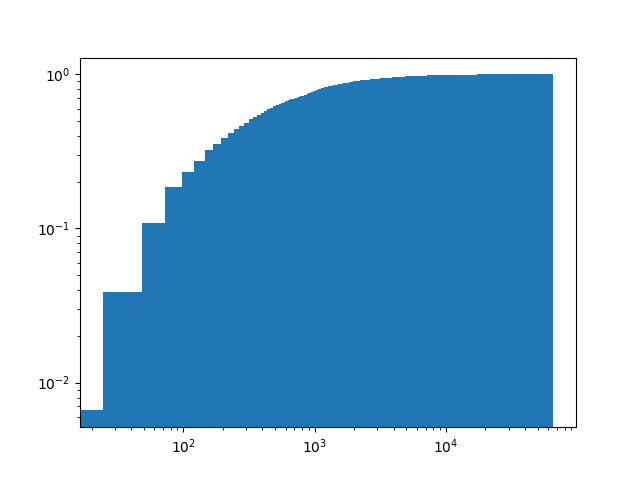

In [25]:
fig, ax = nb_fig(num="texp")
ax.hist(tt_obs["t_exptime"], bins="auto", cumulative=True, density=True)
ax.set_xscale("log")
ax.set_yscale("log")

In [57]:
#tt_obs.write("tt_swift_obs.fits")

In [56]:
keys = ["objID", "obs_id", "target_name", "filters", "s_ra", "s_dec", "t_min", "t_exptime"]
names =["Objects", "Observations", "Targets", "Filters", "RA", "DEC", "Time stamps", "Exposure times"]

for key, name in zip(keys, names):
    print(f'{name+":":<20} {len(np.unique(tt_obs[key])):>10}')


Objects:                 266251
Observations:            115562
Targets:                  27464
Filters:                     11
RA:                      115557
DEC:                     115557
Time stamps:             266159
Exposure times:          206942
